In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 시계열 데이터

## 시계열 데이터 소개 (datetime)

In [2]:
from datetime import datetime
from datetime import timedelta

In [3]:
now = datetime.now()
now

datetime.datetime(2019, 7, 22, 14, 42, 37, 115715)

<img src="img/예제실습/datetime.jpg" alt="datetime" style="width: 1200px;"/>

In [4]:
now.hour

14

In [5]:
now.year

2019

In [6]:
# now 변수의 4주후 날짜 계산
now + timedelta(weeks=4)

datetime.datetime(2019, 8, 19, 14, 42, 37, 115715)

In [7]:
now + timedelta(days=100)

datetime.datetime(2019, 10, 30, 14, 42, 37, 115715)

In [8]:
now + timedelta(hours=5,minutes=30)

datetime.datetime(2019, 7, 22, 20, 12, 37, 115715)

In [9]:
# 편리한 색인
import random 
sample = DataFrame()
sample['date'] = pd.date_range(start='20190701',periods=500)
sample['count'] = random.sample(range(1,1000),500)
sample.head()

,date,count
0,2019-07-01,532
1,2019-07-02,920
2,2019-07-03,598
3,2019-07-04,450
4,2019-07-05,149


In [10]:
sample.dtypes

date     datetime64[ns]
count             int64
dtype: object

In [11]:
# 2019년 8월 데이터만 선택
# 첫번째 방법
sample[sample['date'].isin(pd.date_range(start='2019-08-01',end='2019-08-31'))].head()

,date,count
31,2019-08-01,787
32,2019-08-02,156
33,2019-08-03,279
34,2019-08-04,273
35,2019-08-05,172


In [12]:
# 두번째 방법
# date 컬럼을 row index로 변경한 후 색인
sample.set_index('date',inplace=True)

In [13]:
sample['2019-08'].head()

,count
date,
2019-08-01,787
2019-08-02,156
2019-08-03,279
2019-08-04,273
2019-08-05,172


In [14]:
sample['2019-08'].tail()

,count
date,
2019-08-27,283
2019-08-28,254
2019-08-29,158
2019-08-30,567
2019-08-31,862


In [15]:
sample['2019'].head()

,count
date,
2019-07-01,532
2019-07-02,920
2019-07-03,598
2019-07-04,450
2019-07-05,149


In [16]:
sample['2019-08':'2019-11']

,count
date,
2019-08-01,787
2019-08-02,156
2019-08-03,279
2019-08-04,273
2019-08-05,172
2019-08-06,519
2019-08-07,600
2019-08-08,493
2019-08-09,138


```python
sample['2019-08-15'] # 이렇게 할순 없음 왜냐면 이러면 column으로 생각해서... slicing 
```

In [17]:
sample.loc['2019-08-15']

count    174
Name: 2019-08-15 00:00:00, dtype: int64

In [18]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2019-07-01 to 2020-11-11
Data columns (total 1 columns):
count    500 non-null int64
dtypes: int64(1)
memory usage: 27.8 KB


### strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [19]:
# now 변수를 2018-05-25 형식으로 출력
now.strftime('%Y-%m-%d')

'2019-07-22'

In [20]:
# 실습 - now 변수를 2018/05/25 11:20:30.231452 형식으로 출력
now.strftime('%Y/%m/%d %H:%M:%S.%f')

'2019/07/22 14:42:37.115715'

In [21]:
# 실습 2. now 변수를 2018년 5월 25일로 출력
# now.strftime('%연') 한글 인코딩이 안됨
# now.strftime('%Y년 %m월 %d일') # 인코딩 문제로 strftime 함수가 비정상 동작
# 이런 경우에는 format()을 이용하여 출력하는 것을 권장
'{0}년 {1}월 {2}일'.format(now.year, now.month, now.day)

'2019년 7월 22일'

In [22]:
'{0.year}년 {0.month}월 {0.day}일'.format(now)

'2019년 7월 22일'

In [23]:
# 심화 - week number, weeekday 정보가 필요할 때
# %U : week number(sun to mon)
now.strftime('%U') + '주차'

'29주차'

In [24]:
# %V : ISO 8601 week number (mon to sun)
now.strftime('%V') + '주차'

'30주차'

In [25]:
# %a : weekday
now.strftime('%a')

'Mon'

In [26]:
# %w : weekday(0,1,2,3,4...0:sun)
now.strftime('%w')

'1'

### strptime()으로 문자열을 날짜 타입으로 변환하기

In [27]:
sample = sample.reset_index()
date_str = '19/8/15'
datetime.strptime(date_str,'%y/%m/%d')

datetime.datetime(2019, 8, 15, 0, 0)

In [28]:
now

datetime.datetime(2019, 7, 22, 14, 42, 37, 115715)

In [29]:
sample.date[0].strftime('%U')

'26'

In [30]:
sample['date'].map(lambda x : x.strftime('%U'))[:5]

0    26
1    26
2    26
3    26
4    26
Name: date, dtype: object

## 예제 실습
### 예제1

In [31]:
# sample에 week number랑 week day 컬럼을 추가
# week number 별로 count 컬럼의 합과
# week day 별로 count 컬럼의 합을 구하기
# apply(lambda x : x.strftime('%U'))
sample['wn'] = sample['date'].map(lambda x : x.strftime('%U'))
sample['wn2']  = sample.date.dt.strftime('%U') # Series.dt 사용하기
sample['wd'] = sample['date'].map(lambda x : x.strftime('%a'))
sample['wd2']  = sample.date.dt.strftime('%a')
sample.head()

,date,count,wn,wn2,wd,wd2
0,2019-07-01,532,26,26,Mon,Mon
1,2019-07-02,920,26,26,Tue,Tue
2,2019-07-03,598,26,26,Wed,Wed
3,2019-07-04,450,26,26,Thu,Thu
4,2019-07-05,149,26,26,Fri,Fri


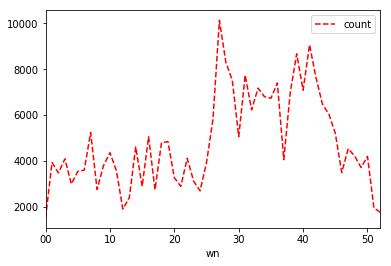

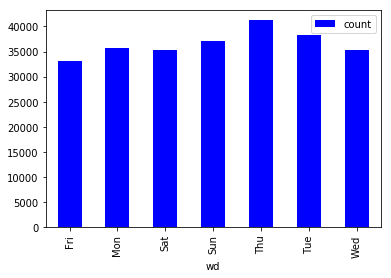

In [32]:
sample.pivot_table(index='wn',aggfunc='sum',values='count').plot(style='--',color='r')
sample.pivot_table(index='wd',aggfunc='sum',values='count').plot(kind='bar',style=':',color='b')
plt.show()

### 예제2 

In [33]:
df = DataFrame({'date':['2019-07-01','2019-07-07','2019-07-11','2019-07-13','2019-07-15',
                        '2019-07-18','2019-07-20','2019-07-21','2019-07-25','2019-07-29'],
                'count' : random.sample(range(1,100),10)})

In [34]:
pd.to_datetime(df['date'])

0   2019-07-01
1   2019-07-07
2   2019-07-11
3   2019-07-13
4   2019-07-15
5   2019-07-18
6   2019-07-20
7   2019-07-21
8   2019-07-25
9   2019-07-29
Name: date, dtype: datetime64[ns]

In [35]:
# df에서의 date를 string에서 datetime 로 변환
df['date2'] = df.date.map(lambda x : datetime.strptime(x,'%Y-%M-%d'))
df.set_index('date')

,count,date2
date,,
2019-07-01,19,2019-01-01 00:07:00
2019-07-07,95,2019-01-07 00:07:00
2019-07-11,63,2019-01-11 00:07:00
2019-07-13,2,2019-01-13 00:07:00
2019-07-15,22,2019-01-15 00:07:00
2019-07-18,39,2019-01-18 00:07:00
2019-07-20,18,2019-01-20 00:07:00
2019-07-21,75,2019-01-21 00:07:00
2019-07-25,4,2019-01-25 00:07:00


## 푸드코트 주문 데이터 분석

In [42]:
# 데이터 읽기
food_court = pd.read_excel('data/food_order.xlsx')

In [43]:
# 데이터 조회
food_court.head()

,date,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
0,2013-08-06,dinner,grill & fry,훈제연어벤또(200개),F,213,0,0,0,0,0,-213,2013,8,6,1
1,2013-08-06,dinner,rice & soup 1,뚝배기 우거지 갈비탕,F,261,0,0,0,0,0,-261,2013,8,6,1
2,2013-08-06,lunch,noodle bar,판모밀정식,F,267,0,0,0,0,0,-267,2013,8,6,1
3,2013-08-06,breakfast,rice & soup 1,설렁탕정식,F,1,0,0,0,0,0,-1,2013,8,6,1
4,2013-08-06,lunch,rice & soup 1,A. 부대찌개정식,F,376,0,0,0,0,0,-376,2013,8,6,1


In [44]:
food_court.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
date             6825 non-null datetime64[ns]
dine_type        6825 non-null object
corner           6825 non-null object
menu             6825 non-null object
is_sold_out      6825 non-null object
use_count        6825 non-null int64
pred_count       6825 non-null int64
additional       6825 non-null int64
good             6825 non-null int64
ok               6825 non-null int64
bad              6825 non-null int64
diff_use_pred    6825 non-null int64
year             6825 non-null int64
month            6825 non-null int64
day              6825 non-null int64
wday             6825 non-null int64
dtypes: datetime64[ns](1), int64(11), object(4)
memory usage: 853.2+ KB


In [55]:
# 'date' 컬럼을 index label로 지정
food_court.set_index('date',inplace=True)

In [56]:
# 2014년 데이터만 선택하여 출력
food_court['2014'].head()

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2014-01-02,breakfast,take out,쿡살라미샌드위치,F,51,0,0,0,0,0,-51,2014,1,2,3
2014-01-02,dinner,noodle bar,오징어비빔국수,F,111,0,0,0,0,0,-111,2014,1,2,3
2014-01-02,dinner,take out,날치알캘리포니아롤,F,386,0,0,0,0,0,-386,2014,1,2,3
2014-01-02,lunch,burger&pizza,갈릭오일파스타,T,142,0,0,0,0,0,-142,2014,1,2,3
2014-01-02,dinner,burger&pizza,참치김치그라탕,T,151,0,0,0,0,0,-151,2014,1,2,3


In [57]:
# 2015년 1월 데이터만 선택하여 출력
food_court['2015-01'].head()

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2015-01-02,dinner,after school,참깨라면&볶음김치김밥,F,39,80,10,0,0,0,51,2015,1,2,4
2015-01-02,lunch,after school,오징어김치볶음밥&계란후라이,F,158,170,40,0,0,0,52,2015,1,2,4
2015-01-02,breakfast,rice & soup 1,감자호박국&소고기야채볶음,F,35,20,10,0,0,0,-5,2015,1,2,4
2015-01-02,lunch,rice & soup 1,청국장찌개&돼지고기고추장볶음,F,235,380,50,0,0,0,195,2015,1,2,4
2015-01-02,lunch,noodle bar,자장면&김치만두찜,F,218,230,40,0,0,0,52,2015,1,2,4


In [58]:
# 2014년 8월 1일부터 2014년 9월 25일까지 데이터만 출력
food_court['2014-08-01':'2014-09-25']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2014-08-01,dinner,after school,햄모듬라면&콩도너츠,F,137,0,0,0,0,0,-137,2014,8,1,4
2014-08-01,lunch,after school,카레라면&비빔채소만두,T,129,0,0,0,0,0,-129,2014,8,1,4
2014-08-01,dinner,grill & fry,취나물밥&양념장,F,68,0,0,0,0,0,-68,2014,8,1,4
2014-08-01,breakfast,take out,7곡빵샌드위치,F,39,0,0,0,0,0,-39,2014,8,1,4
2014-08-01,lunch,grill & fry,더덕비빔밥,F,158,0,0,0,0,0,-158,2014,8,1,4
2014-08-01,dinner,noodle bar,냉메밀소바&김가루양념밥,T,121,0,0,0,0,0,-121,2014,8,1,4
2014-08-01,dinner,take out,김치볶음밥&스크램블에그,F,341,0,0,0,0,0,-341,2014,8,1,4
2014-08-01,breakfast,rice & soup 1,닭곰탕,F,40,0,0,0,0,0,-40,2014,8,1,4
2014-08-01,lunch,noodle bar,초계국수,T,136,0,0,0,0,0,-136,2014,8,1,4


In [59]:
# 2015년 6월 30일 데이터만 출력
food_court.loc['2015-06-30']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2015-06-30,dinner,take out,비엔나소시지컵밥,F,116,110,10,0,0,0,4,2015,6,30,1
2015-06-30,lunch,take out,콥샐러드,F,281,300,0,3,0,0,19,2015,6,30,1
2015-06-30,lunch,rice & soup 1,감자탕,F,230,250,10,63,46,30,30,2015,6,30,1
2015-06-30,lunch,after school,짜파게티,F,147,190,0,85,21,2,43,2015,6,30,1
2015-06-30,lunch,burger&pizza,콤비네이션피자,F,93,140,0,44,15,3,47,2015,6,30,1
2015-06-30,dinner,grill & fry,불고기채소비빔밥,F,145,200,0,31,11,2,55,2015,6,30,1
2015-06-30,breakfast,take out,샌드위치콤보&음료&과일,F,60,40,10,0,1,0,-10,2015,6,30,1
2015-06-30,dinner,after school,햄모둠라면,T,113,100,10,20,16,3,-3,2015,6,30,1
2015-06-30,dinner,burger&pizza,왕소시지김치그라탕,F,82,110,10,14,12,2,38,2015,6,30,1


### date_range()를 활용한 고급 기법
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

In [51]:
# 특정 기간의 날짜 생성
pd.date_range(start='2019-08-01',end='2019-08-31')

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
               '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
               '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
               '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30', '2019-08-31'],
              dtype='datetime64[ns]', freq='D')

In [60]:
# start 날짜를 기준으로 periods 갯수만큼 날짜 생성
pd.date_range(start='2019-08-01',periods=10)

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-10'],
              dtype='datetime64[ns]', freq='D')

In [63]:
#특정 주기로 날짜를 생성 - freq 인자
# D: 일단위
# W: 주 단위 (일요일만 선택)
# 상세 내용은 https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 확인
pd.date_range(start='2019-08-01',end='2019-12-31',
              freq='W')

DatetimeIndex(['2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [64]:
# W-MON: 주 단위이되, 월요일만 선택
# W-TUE: 주 단위이되, 화요일만 선택. WED, THU, FRI, SAT, SUN 모두 가능
pd.date_range(start='2019-08-01',end='2019-12-31',
              freq='W-MON')

DatetimeIndex(['2019-08-05', '2019-08-12', '2019-08-19', '2019-08-26',
               '2019-09-02', '2019-09-09', '2019-09-16', '2019-09-23',
               '2019-09-30', '2019-10-07', '2019-10-14', '2019-10-21',
               '2019-10-28', '2019-11-04', '2019-11-11', '2019-11-18',
               '2019-11-25', '2019-12-02', '2019-12-09', '2019-12-16',
               '2019-12-23', '2019-12-30'],
              dtype='datetime64[ns]', freq='W-MON')

In [65]:
# M: 매달 마지막날만 선택
# MS: 매달 첫째날만 선택
# B: 주중만 선택 (Business day)
pd.date_range(start='2019-08-01',end='2019-12-31',
              freq='B')

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=109, freq='B')

In [66]:
print(food_court.index.min(),food_court.index.max())

2013-08-06 00:00:00 2015-07-27 00:00:00


In [68]:
# 식당 데이터 중 월요일 데이터만 선택하여 출력
# date_range()를 이용하여, 2013-08-06~ 2015-07-27까지 
# 1) 매주 월요일만 가지고 있는 리스트 생성
# 매주월요일 = pd.date_range(start = '2013-08-06', end = '2015-7-27', freq = 'W-MON')
every_monday = pd.date_range(start=food_court.index.min(),end=food_court.index.max(),
                             freq='W-MON')
every_monday

DatetimeIndex(['2013-08-12', '2013-08-19', '2013-08-26', '2013-09-02',
               '2013-09-09', '2013-09-16', '2013-09-23', '2013-09-30',
               '2013-10-07', '2013-10-14',
               ...
               '2015-05-25', '2015-06-01', '2015-06-08', '2015-06-15',
               '2015-06-22', '2015-06-29', '2015-07-06', '2015-07-13',
               '2015-07-20', '2015-07-27'],
              dtype='datetime64[ns]', length=103, freq='W-MON')

In [71]:
# 2) 조건 색인을 이용하여, 매주월요일 데이터만 선택하여 출력
display(food_court.loc[food_court.index.isin(every_monday)].head())
display(food_court.loc[food_court.index.isin(every_monday)].tail())

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2013-08-12,dinner,noodle bar,차슈라멘,F,179,0,0,0,0,0,-179,2013,8,12,0
2013-08-12,breakfast,rice & soup 1,뚝배기순대국,F,26,0,0,0,0,0,-26,2013,8,12,0
2013-08-12,lunch,rice & soup 1,A:누룽지장각백숙,F,504,0,0,0,0,0,-504,2013,8,12,0
2013-08-12,lunch,noodle bar,유니자장면,F,167,0,0,0,0,0,-167,2013,8,12,0
2013-08-12,dinner,rice & soup 1,김치날치알밥,F,216,0,0,0,0,0,-216,2013,8,12,0


,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2015-07-27,lunch,grill & fry,돼지고기채소비빔밥,F,268,0,0,0,0,0,-268,2015,7,27,0
2015-07-27,lunch,rice & soup 2,생오리고추장불고기&부추생채,F,264,0,0,0,0,0,-264,2015,7,27,0
2015-07-27,breakfast,take out,샌드위치콤보&음료&과일,F,58,0,0,0,0,0,-58,2015,7,27,0
2015-07-27,lunch,noodle bar,김치비빔국수,F,202,0,0,0,0,0,-202,2015,7,27,0
2015-07-27,lunch,take out,닭가슴살크랜베리샐러드,F,304,0,0,0,0,0,-304,2015,7,27,0


### 3. 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기

In [74]:
# 분석 실습
# 1. 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기
# 2. 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기
# 3. 2014년 한 해 동안 가장 많은 판매량을 올린 메뉴 찾기
# 4. 2014년 한 해 동안 각 코너 별로 판매량을 그래프로 표현

In [75]:
# 데이터 탐색
food_court.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6825 entries, 2013-08-06 to 2015-07-27
Data columns (total 15 columns):
dine_type        6825 non-null object
corner           6825 non-null object
menu             6825 non-null object
is_sold_out      6825 non-null object
use_count        6825 non-null int64
pred_count       6825 non-null int64
additional       6825 non-null int64
good             6825 non-null int64
ok               6825 non-null int64
bad              6825 non-null int64
diff_use_pred    6825 non-null int64
year             6825 non-null int64
month            6825 non-null int64
day              6825 non-null int64
wday             6825 non-null int64
dtypes: int64(11), object(4)
memory usage: 1013.1+ KB


In [77]:
# 데이터 크기
food_court.shape

(6825, 15)

In [80]:
# 모든 날짜에 데이터가 있는지 확인
food_court.wday.value_counts()
# 0: 월, 1: 화, 2: 수
# 주중 데이터만 있는 것을 확인

0    1433
1    1432
2    1373
3    1298
4    1289
Name: wday, dtype: int64

In [86]:
# 모든 주중에는 빠져 있는 날이 있을까
# 1. 데이터 수집 기간 동안의 주중 날짜 생성
business_day = pd.date_range(start=food_court.index.min(), end=food_court.index.max(),
                             freq='B')
business_day

DatetimeIndex(['2013-08-06', '2013-08-07', '2013-08-08', '2013-08-09',
               '2013-08-12', '2013-08-13', '2013-08-14', '2013-08-15',
               '2013-08-16', '2013-08-19',
               ...
               '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
               '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23',
               '2015-07-24', '2015-07-27'],
              dtype='datetime64[ns]', length=515, freq='B')

In [94]:
# 2. 미수집 날짜가 있는지 확인
food_court.index.unique()

DatetimeIndex(['2013-08-06', '2013-08-12', '2013-08-13', '2013-08-14',
               '2013-08-19', '2013-08-20', '2013-08-21', '2013-08-22',
               '2013-08-23', '2013-08-26',
               ...
               '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
               '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23',
               '2015-07-24', '2015-07-27'],
              dtype='datetime64[ns]', name='date', length=480, freq=None)

In [95]:
business_day[~business_day.isin(food_court.index.unique())]

DatetimeIndex(['2013-08-07', '2013-08-08', '2013-08-09', '2013-08-15',
               '2013-08-16', '2013-09-18', '2013-09-19', '2013-09-20',
               '2013-10-03', '2013-10-09', '2013-12-25', '2014-01-01',
               '2014-01-30', '2014-01-31', '2014-04-04', '2014-05-01',
               '2014-05-05', '2014-05-06', '2014-06-04', '2014-06-06',
               '2014-08-15', '2014-09-08', '2014-09-09', '2014-09-10',
               '2014-10-03', '2014-10-09', '2014-12-25', '2015-01-01',
               '2015-02-18', '2015-02-19', '2015-02-20', '2015-04-03',
               '2015-05-01', '2015-05-05', '2015-05-25'],
              dtype='datetime64[ns]', freq=None)

In [96]:
set(business_day) - set(food_court.index.unique())

{Timestamp('2013-08-07 00:00:00', freq='B'),
 Timestamp('2013-08-08 00:00:00', freq='B'),
 Timestamp('2013-08-09 00:00:00', freq='B'),
 Timestamp('2013-08-15 00:00:00', freq='B'),
 Timestamp('2013-08-16 00:00:00', freq='B'),
 Timestamp('2013-09-18 00:00:00', freq='B'),
 Timestamp('2013-09-19 00:00:00', freq='B'),
 Timestamp('2013-09-20 00:00:00', freq='B'),
 Timestamp('2013-10-03 00:00:00', freq='B'),
 Timestamp('2013-10-09 00:00:00', freq='B'),
 Timestamp('2013-12-25 00:00:00', freq='B'),
 Timestamp('2014-01-01 00:00:00', freq='B'),
 Timestamp('2014-01-30 00:00:00', freq='B'),
 Timestamp('2014-01-31 00:00:00', freq='B'),
 Timestamp('2014-04-04 00:00:00', freq='B'),
 Timestamp('2014-05-01 00:00:00', freq='B'),
 Timestamp('2014-05-05 00:00:00', freq='B'),
 Timestamp('2014-05-06 00:00:00', freq='B'),
 Timestamp('2014-06-04 00:00:00', freq='B'),
 Timestamp('2014-06-06 00:00:00', freq='B'),
 Timestamp('2014-08-15 00:00:00', freq='B'),
 Timestamp('2014-09-08 00:00:00', freq='B'),
 Timestamp

In [107]:
food_court.pivot_table(index='date',
                       aggfunc='sum',
                       values='use_count').sort_values(by='use_count',
                                                       ascending=False).head()

,use_count
date,
2013-10-23,4267
2013-10-15,3627
2013-09-03,3581
2013-10-01,3569
2013-12-10,3568


In [108]:
food_court.groupby('date')['use_count'].sum().sort_values().tail(1)

date
2013-10-23    4267
Name: use_count, dtype: int64

### 4. (실습 1) 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기

In [151]:
# food_court.pivot_table(index='menu',
#                        aggfunc='count',
#                        values='dine_type').sort_values(by='dine_type',ascending=False).head(10)
favorite_food = food_court.pivot_table(index='menu',
                                       columns='dine_type',
                                       aggfunc='sum',
                                       values='use_count').fillna(0)

In [157]:
favorite_food.sort_values(by='breakfast',ascending=False).head()

dine_type,breakfast,dinner,lunch
menu,,,
샌드위치콤보&음료&과일,7754.0,0.0,0.0
A: 샌드위치 SET 510kcal,1593.0,0.0,0.0
A: 샌드위치 SET 510,1377.0,0.0,0.0
샌드위치콤보&음료&사과,1202.0,0.0,0.0
NC모닝,1198.0,0.0,0.0


In [156]:
favorite_food.sort_values(by='lunch',ascending=False).head()

dine_type,breakfast,dinner,lunch
menu,,,
콥샐러드,0.0,0.0,13747.0
훈제오리&단호박샐러드,0.0,0.0,13252.0
돈가스샐러드,0.0,0.0,11279.0
연어레몬샐러드,0.0,0.0,8628.0
리코타치즈&치아바타샐러드,0.0,0.0,8041.0


In [155]:
favorite_food.sort_values(by='dinner',ascending=False).head()

dine_type,breakfast,dinner,lunch
menu,,,
로제컵파스타&새우튀김,0.0,7560.0,0.0
미트볼라이스,0.0,6315.0,0.0
토마토미트볼컵파스타,0.0,5391.0,0.0
비엔나소시지컵밥*스크램블에그,0.0,3742.0,0.0
참치김치찌개,383.0,3692.0,5175.0


### 5. (실습 2) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기 

In [167]:
monthly_sales = food_court['2014'].pivot_table(index='month', columns='corner',
                                               aggfunc='mean', values='use_count').fillna(0)
monthly_sales

corner,after school,burger&pizza,grill & fry,noodle bar,rice & soup 1,rice & soup 2,take out
month,,,,,,,
1,174.333333,142.282051,222.400000,199.625000,317.116667,0.000000,249.383333
2,172.589744,140.948718,220.282051,190.692308,279.155172,199.500000,254.368421
3,170.952381,153.500000,221.809524,181.476190,203.682540,257.400000,252.161290
4,166.487805,146.309524,224.829268,174.609756,190.919355,229.523810,243.714286
5,145.000000,125.138889,231.027778,183.722222,182.907407,259.166667,236.508772
6,149.694444,136.055556,241.222222,178.210526,193.789474,258.277778,232.684211
7,148.933333,160.622222,239.304348,205.644444,199.898551,275.090909,229.217391
8,129.025000,160.900000,218.500000,180.725000,197.000000,268.400000,185.416667
9,112.526316,158.243243,205.405405,151.342105,161.964912,224.842105,114.736842


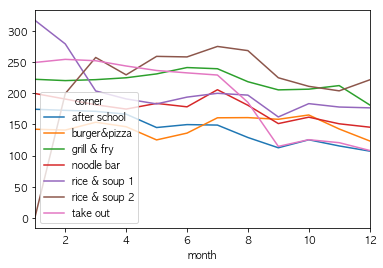

In [171]:
# food_court.groupby(['date','corner'])['use_count'].sum().head()
monthly_sales.plot()
plt.show()

### 6. (실습 3) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력

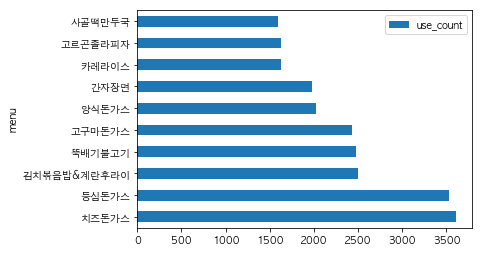

In [148]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'
food_court[food_court.is_sold_out == 'T'].pivot_table(index='menu',
                                                      aggfunc='sum',
                                                      values='use_count').sort_values(by='use_count',
                                                                                      ascending=False).head(10).plot(kind = 'barh')
plt.show()

In [174]:
food_court[food_court.is_sold_out == 'T'].menu.value_counts().sort_values(ascending=False).head()

치즈돈가스          14
등심돈가스          13
김치볶음밥&계란후라이    11
고구마돈가스          9
고르곤졸라피자         9
Name: menu, dtype: int64